In [1]:
from pathlib import Path

# Get the directory of the current script as the main directory
main_dir = Path.cwd()

# Define subdirectories based on the main directory
filepath = main_dir / 'files'
extract_file_path = filepath / 'expected-img'
final_filepath = filepath / 'final-output'
input_path = filepath / 'input-img'

In [3]:
import zipfile
import os

# Specify the directory to extract files
extract_path = r'C:\Image_Processing_Task\files'

# List of ZIP files to unzip
zip_files = [r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\input images.zip", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\expected ouptut.zip"]

# Create the directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip each file to the specified extract path
for zip_file in zip_files:
    try:
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            print(f"{zip_file} unzipped successfully!")
    except PermissionError:
        print(f"Permission denied: Could not access {zip_file}.")
    except Exception as e:
        print(f"An error occurred: {e}")


C:\Sapna_Stuff\Projects_Sapna\image-processing-task\input images.zip unzipped successfully!
C:\Sapna_Stuff\Projects_Sapna\image-processing-task\expected ouptut.zip unzipped successfully!


In [4]:
def unziping(zip_path,output_dir):
    
    os.makedirs(output_dir, exist_ok=True)

    # Unzip each file to the specified extract path
    
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(output_dir)
                print(f"{zip_path} unzipped successfully!")
    except PermissionError:
            print(f"Permission denied: Could not access {zip_path}.")
    except Exception as e:
            print(f"An error occurred: {e}")


In [5]:
unziping(r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\input images.zip",r'C:\Image_Processing_Task\files\input-img')

C:\Sapna_Stuff\Projects_Sapna\image-processing-task\input images.zip unzipped successfully!


In [6]:
unziping(r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\expected ouptut.zip",r'C:\Image_Processing_Task\files\expected-img')


C:\Sapna_Stuff\Projects_Sapna\image-processing-task\expected ouptut.zip unzipped successfully!


In [14]:
! pip install rembg


In [19]:


# Input and output directories
input_dir = input_path  # Use your defined input_path
output_dir = final_filepath  # Use your defined final_filepath

# Create the output directory if it doesn't exist
output_dir.mkdir(parents=True, exist_ok=True)

# List to store image file paths
image_file_paths = []

# Iterate through the directory and collect image file paths
for image_file in input_dir.glob('*.jpeg'):  # Adjust the pattern as needed
    image_file_paths.append(image_file)

# Process each image
for filename in image_file_paths:
    # Load image
    with open(filename, 'rb') as i:
        input_image = i.read()

    # Remove background
    output_image_data = remove(input_image)

    # Convert the result to a PIL image and then to a NumPy array for OpenCV processing
    img = Image.open(io.BytesIO(output_image_data))
    img_np = np.array(img)

    # Convert to grayscale
    gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    #blurred = cv2.GaussianBlur(gray, (1, 1), 0)

    # Apply thresholding to create a binary segmentation mask
    _, binary_mask = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save each processing step for reference
    result_filename = output_dir / f'result_{filename.name}'  # Use filename.name to get the file name without path
    cv2.imwrite(str(result_filename), binary_mask)  # Convert to string for OpenCV

    print(f"Processed and saved: {result_filename}")

print("All images processed.")


Processed and saved: c:\Image_Processing_Task\files\final-output\result_1.jpeg
Processed and saved: c:\Image_Processing_Task\files\final-output\result_2.jpeg
Processed and saved: c:\Image_Processing_Task\files\final-output\result_3.jpeg
All images processed.


In [7]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import io

# Load and remove background
with open('C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/image1.jpeg', 'rb') as i:
    input_image = i.read()

output_image = remove(input_image)

# Display the result
img = Image.open(io.BytesIO(output_image))
plt.imshow(img)
plt.axis('off')
plt.show()

# Save the result if needed
img.save('output_image.png')


c:\Users\sachi\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\sachi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\sachi\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input1.jpeg'

In [11]:
! pip install opencv-python pillow rembg matplotlib


In [ ]:
# import cv2
# import numpy as np

# # Load image
# image = cv2.imread(r'C:\Image_Processing_Task\files\input-img\1.jpeg')

# # Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply thresholding to create a binary mask
# _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# # Invert mask
# mask = cv2.bitwise_not(mask)

# # Use mask to remove background
# result = cv2.bitwise_and(image, image, mask=mask)

# # Save or display result
# cv2.imwrite('result.png', result)


In [ ]:
# import cv2
# import numpy as np

# # Load image
# image = cv2.imread('C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input1.jpeg')

# # Initialize mask and background/foreground models
# mask = np.zeros(image.shape[:2], np.uint8)
# bgdModel = np.zeros((1, 65), np.float64)
# fgdModel = np.zeros((1, 65), np.float64)

# # Define initial rectangle around the object
# rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# # Apply GrabCut algorithm
# cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
# mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
# result = image * mask2[:, :, np.newaxis]

# # Save or display result
# cv2.imwrite('result.png', result)


In [ ]:
# from rembg import remove
# from PIL import Image
# import io

# # Load image
# with open('C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input1.jpeg', 'rb') as i:
#     input_image = i.read()

# # Remove background
# output_image = remove(input_image)

# # Save the result
# with open('result.png', 'wb') as o:
#     o.write(output_image)


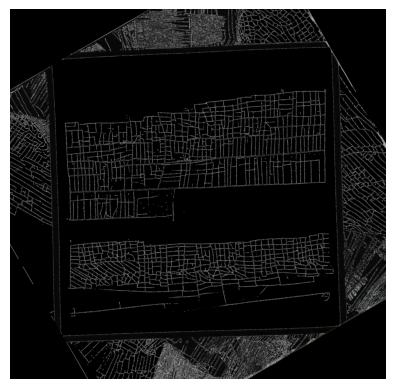

True

In [16]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the image
# image = cv2.imread(r'C:\Image_Processing_Task\files\input-img\1.jpeg')

# # Convert to grayscale and apply thresholding for background removal
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
# result = cv2.bitwise_and(image, image, mask=mask)

# # Rotate the image by 45 degrees (or any angle)
# (h, w) = result.shape[:2]
# center = (w // 2, h // 2)

# # Define rotation matrix
# angle = 390  # Specify the rotation angle
# rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# # Perform the rotation
# rotated_image = cv2.warpAffine(result, rotation_matrix, (w, h))

# # Convert the result to RGB for displaying in matplotlib
# #rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# # Display the rotated image
# plt.imshow(rotated_image)
# plt.axis('off')
# plt.show()

# # Save the rotated image
# cv2.imwrite('rotated_output_image1.png', rotated_image)


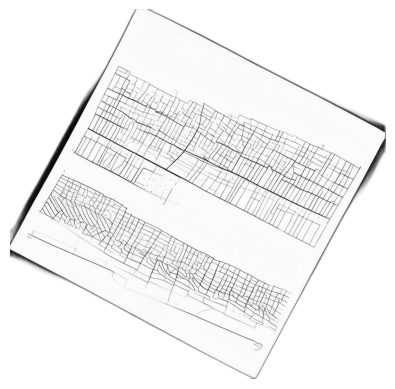

In [17]:
# from rembg import remove
# from PIL import Image
# import io
# import matplotlib.pyplot as plt

# # Load and remove background
# with open('C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input2.jpeg', 'rb') as i:
#     input_image = i.read()
# output_image = remove(input_image)

# # Open the result as a PIL image
# img = Image.open(io.BytesIO(output_image))

# # Display the result
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# # Save the result
# img.save('output_image3.png')


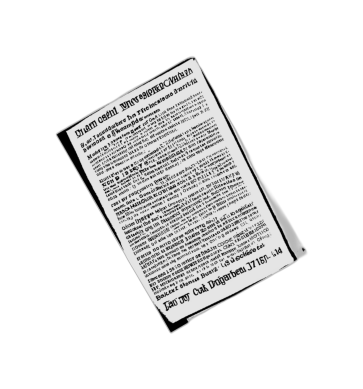

In [21]:
# from rembg import remove
# from PIL import Image
# import io
# import matplotlib.pyplot as plt

# # Load and remove background
# with open('C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input1.jpeg', 'rb') as i:
#     input_image = i.read()
# output_image = remove(input_image)

# # Open the result as a PIL image
# img = Image.open(io.BytesIO(output_image))

# # Rotate the image by a specified angle, e.g., 45 degrees
# rotated_img = img.rotate(390, expand=True)  # Set expand=True to adjust the canvas size

# # Display the rotated image
# plt.imshow(rotated_img)
# plt.axis('off')
# plt.show()

# # Save the rotated image
# rotated_img.save('output_image3_rotated.png')


In [30]:
# from rembg import remove
# from PIL import Image
# import io
# import os

# # Input and output directories
# input_dir = 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/'  # Directory, not a specific file
# output_dir = 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/output_images/'

# # X-axis shift value in pixels
# x_shift =415   # Adjust this value as needed

# # Ensure output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # Process each image in the input directory
# for filename in os.listdir(input_dir):
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Load and remove background
#         with open(os.path.join(input_dir, filename), 'rb') as i:
#             input_image = i.read()
#         output_image = remove(input_image)

#         # Open the result as a PIL image
#         img = Image.open(io.BytesIO(output_image))

#         # Calculate new width and create a transparent canvas
#         new_width = img.width + abs(x_shift)
#         new_img = Image.new("RGBA", (new_width, img.height), (255, 255, 255, 0))  # Transparent background

#         # Paste the image onto the new canvas with the x-axis shift
#         if x_shift > 0:
#             new_img.paste(img, (x_shift, 0))  # Shift right
#         else:
#             new_img.paste(img, (0, 0))  # No shift or shift left

#         # Save the shifted image as PNG to retain transparency
#         new_img.save(os.path.join(output_dir, f'shifted_{os.path.splitext(filename)[0]}.png'), 'PNG')
        
#         print(f"Processed and saved: {filename}")

# print("All images processed.")


Processed and saved: input1.jpeg
Processed and saved: input2.jpeg
Processed and saved: input3.jpeg
All images processed.


In [7]:
# import cv2

# # Define the file paths of your images and their specific rotation angles
# image_angles = {
#     r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg": 5,  # Rotate image1.jpg by 30 degrees
#      r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg": -45,  # Rotate image2.jpg by 45 degrees
#      r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out3.jpeg": 5   # Rotate image3.jpg by 90 degrees
# }

# # Loop through each image and apply its specific rotation
# for image_path, angle in image_angles.items():
#     img = cv2.imread(image_path)  # Read the image file

#     # Get the dimensions of the image
#     (h, w) = img.shape[:2]
#     center = (w // 2, h // 2)  # Calculate the center of the image

#     # Calculate the rotation matrix
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

#     # Perform the rotation
#     rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

    # Save the rotated image with a new name
    # new_image_name = f"{image_path.split('.')[0]}rotated{angle}.jpg"
    # cv2.imwrite(new_image_name, rotated_img)
    # print(f"Saved rotated image: {new_image_name}")

Saved rotated image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1rotated5.jpg
Saved rotated image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2rotated-45.jpg
Saved rotated image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out3rotated5.jpg


In [9]:
# import cv2
# import numpy as np

# # Define the file paths of your images
# image_paths = [r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg"]

# def calculate_rotation_angle(edges):
#     # Use Hough Line Transform to detect lines in the edge-detected image
#     lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
    
#     if lines is None:
#         return 0  # No lines detected, assume no rotation needed

#     # Calculate the angle of each line in degrees
#     angles = []
#     for line in lines:
#         rho, theta = line[0]
#         angle = np.degrees(theta) - 90  # Convert from radians to degrees and adjust
#         angles.append(angle)

#     # Get the median angle (this minimizes the effect of outliers)
#     median_angle = np.median(angles)
#     return median_angle

# # Loop through each image, detect edges, calculate rotation angle, and apply correction
# for image_path in image_paths:
#     img = cv2.imread(image_path)  # Read the image file
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
#     # Detect edges using the Canny edge detector
#     edges = cv2.Canny(gray, 50, 150)

#     # Calculate the rotation angle based on edge orientation
#     angle = calculate_rotation_angle(edges)
#     print(f"Calculated angle for {image_path}: {angle}")

#     # Get the image center and rotation matrix to apply correction
#     (h, w) = img.shape[:2]
#     center = (w // 2, h // 2)
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

#     # Rotate the image to correct the orientation
#     rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

#     # Save the rotated image with a new name
#     new_image_name = f"{image_path.split('.')[0]}_corrected.jpg"
#     cv2.imwrite(new_image_name, rotated_img)
#     print(f"Saved corrected image: {new_image_name}")

Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg: -2.0000076293945312
Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1_corrected.jpg
Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg: -13.0
Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2_corrected.jpg
Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg: -2.0000076293945312
Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1_corrected.jpg


Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg: -2.0000076293945312


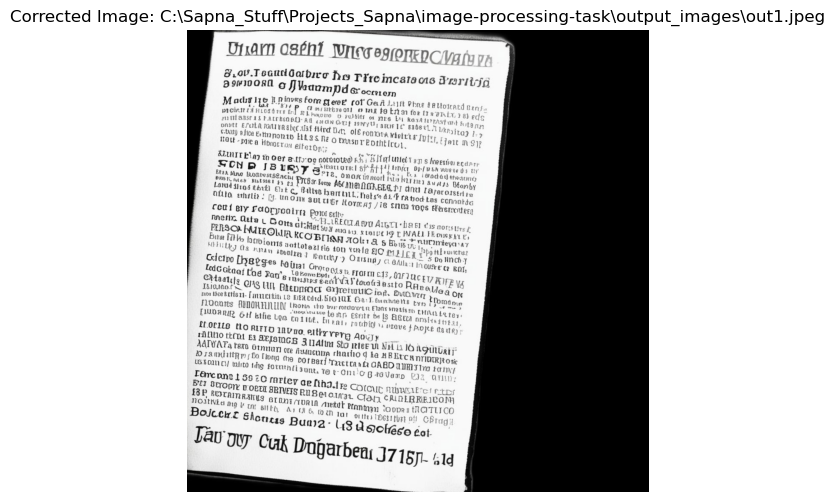

Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1_corrected.jpg
Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg: -13.0


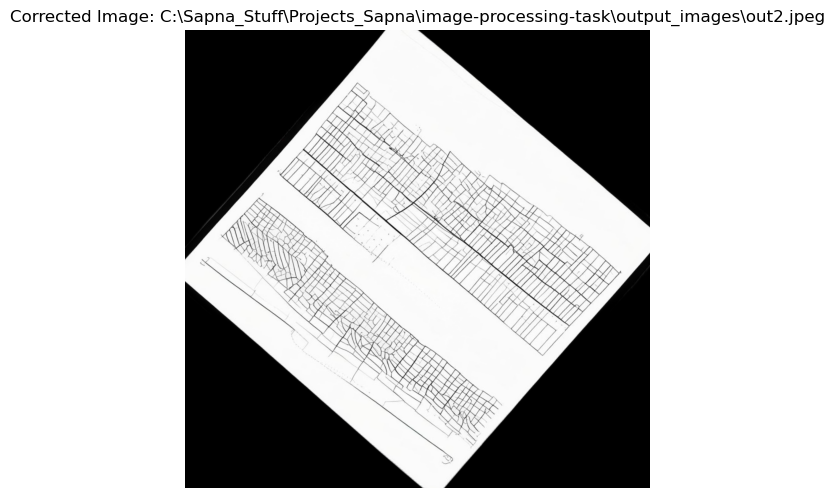

Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2_corrected.jpg
Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg: -2.0000076293945312


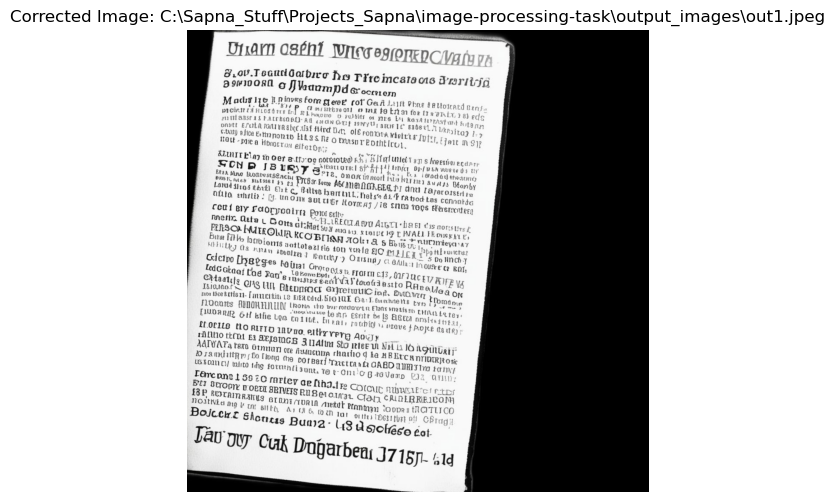

Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1_corrected.jpg


In [11]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the file paths of your images
# image_paths = [r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg"]

# def calculate_vertical_angle(edges):
#     # Use Hough Line Transform to detect lines in the edge-detected image
#     lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
    
#     if lines is None:
#         return 0  # No lines detected, assume no rotation needed

#     # Calculate angles of lines relative to the vertical axis
#     angles = []
#     for line in lines:
#         rho, theta = line[0]
#         angle = np.degrees(theta) - 90  # Convert to degrees and adjust to vertical
#         angles.append(angle)

    # Get the median angle, which represents the overall tilt
    # median_angle = np.median(angles)
    # return median_angle

# Function to display images using matplotlib
# def show_image(image, title="Image"):
#     plt.figure(figsize=(6,6))
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# # Loop through each image, detect edges, calculate rotation angle, apply correction, and save
# for image_path in image_paths:
#     img = cv2.imread(image_path)  # Read the image file
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
#     # Detect edges using the Canny edge detector
#     edges = cv2.Canny(gray, 50, 150)

#     # Calculate the angle needed to make content vertically upright
#     angle = calculate_vertical_angle(edges)
#     print(f"Calculated angle for {image_path}: {angle}")

    # Rotate image only if the angle is not upright (e.g., more than 1 degree)
    # if abs(angle) > 1:
    #     # Get the image center and rotation matrix
    #     (h, w) = img.shape[:2]
    #     center = (w // 2, h // 2)
    #     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    #     # Rotate the image to correct the orientation
    #     rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

    #     # Display the corrected image virtually
    #     show_image(rotated_img, title=f"Corrected Image: {image_path}")

    #     # Save the corrected image with a new filename
    #     new_image_name = f"{image_path.split('.')[0]}_corrected.jpg"
    #     cv2.imwrite(new_image_name, rotated_img)
    #     print(f"Saved corrected image: {new_image_name}")
    # else:
    #     print(f"{image_path} is already upright.")

Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg: -2.0000076293945312


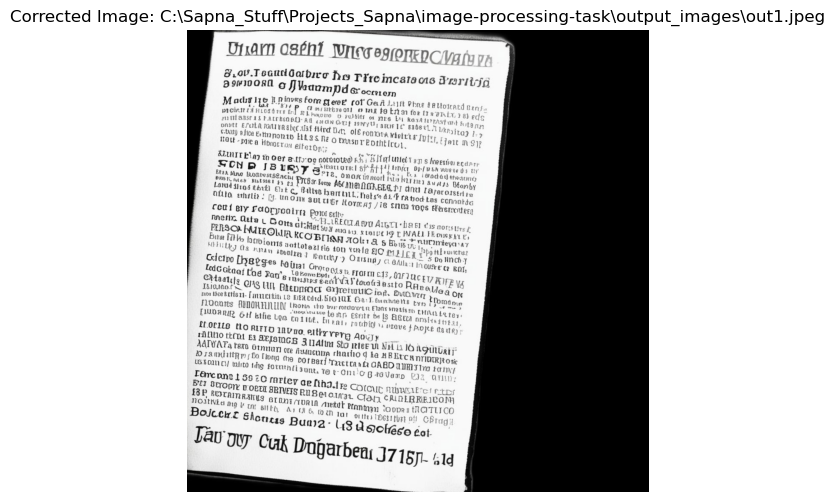

Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1_corrected.jpg
Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg: -13.0


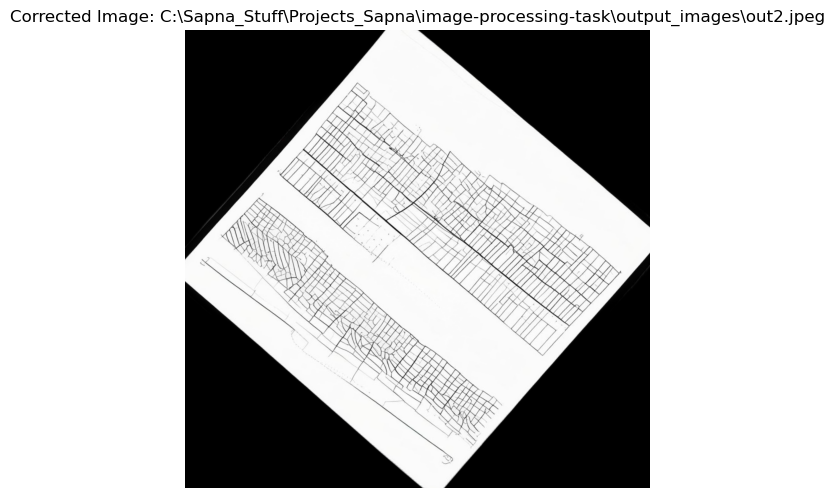

Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2_corrected.jpg
Calculated angle for C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg: -2.0000076293945312


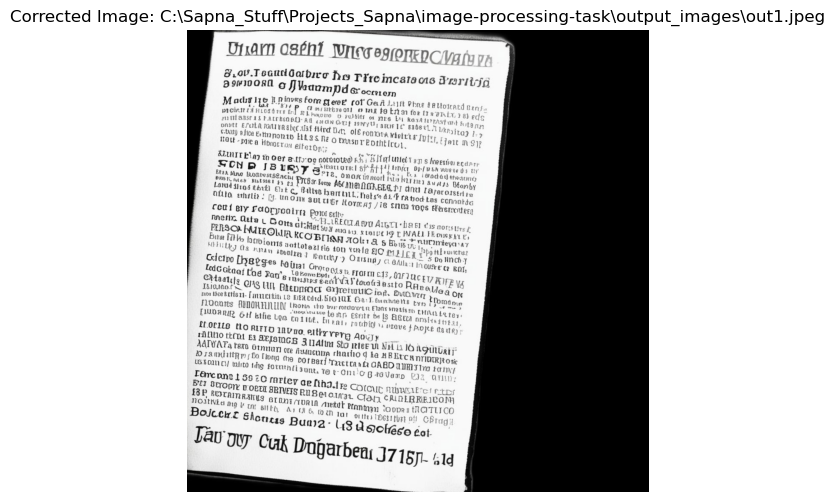

Saved corrected image: C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1_corrected.jpg


In [10]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the file paths of your images
# image_paths = [r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out2.jpeg", r"C:\Sapna_Stuff\Projects_Sapna\image-processing-task\output_images\out1.jpeg"]

# def calculate_rotation_angle(edges):
#     # Use Hough Line Transform to detect lines in the edge-detected image
#     lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)
    
#     if lines is None:
#         return 0  # No lines detected, assume no rotation needed

#     # Calculate the angle of each line in degrees
#     angles = []
#     for line in lines:
#         rho, theta = line[0]
#         angle = np.degrees(theta) - 90  # Convert from radians to degrees and adjust
#         angles.append(angle)

#     # Get the median angle (this minimizes the effect of outliers)
#     median_angle = np.median(angles)
#     return median_angle

# # Function to display images using matplotlib
# def show_image(image, title="Image"):
#     plt.figure(figsize=(6,6))
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.title(title)
    # plt.axis('off')
    # plt.show()

# Loop through each image, detect edges, calculate rotation angle, apply correction, and save
# for image_path in image_paths:
#     img = cv2.imread(image_path)  # Read the image file
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
#     # Detect edges using the Canny edge detector
#     edges = cv2.Canny(gray, 50, 150)

#     # Calculate the rotation angle based on edge orientation
#     angle = calculate_rotation_angle(edges)
#     print(f"Calculated angle for {image_path}: {angle}")

#     # Get the image center and rotation matrix to apply correction
#     (h, w) = img.shape[:2]
#     center = (w // 2, h // 2)
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

#     # Rotate the image to correct the orientation
#     rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

#     # Display the corrected image virtually
#     show_image(rotated_img, title=f"Corrected Image: {image_path}")

#     # Save the corrected image with a new filename
#     new_image_name = f"{image_path.split('.')[0]}_corrected.jpg"
#     cv2.imwrite(new_image_name, rotated_img)
#     print(f"Saved corrected image: {new_image_name}")

In [33]:
# from rembg import remove
# from PIL import Image
# import io
# import os
# import numpy as np

# # Function to determine rotation angle based on image content
# def determine_rotation(image):
#     # Convert image to grayscale for better analysis
#     gray_image = image.convert('L')
    
#     # Convert image to numpy array
#     image_array = np.array(gray_image)
    
#     # Calculate the edges using Sobel filter or any edge detection
#     from scipy.ndimage import sobel
#     dx = sobel(image_array, axis=0, mode='constant')
#     dy = sobel(image_array, axis=1, mode='constant')
    
#     # Calculate the gradient magnitude
#     gradient_magnitude = np.hypot(dx, dy)
#     gradient_magnitude = gradient_magnitude / np.max(gradient_magnitude)  # Normalize
    
#     # Calculate the angle of rotation based on the gradient
#     if np.sum(gradient_magnitude) > 0:  # Check if there are significant edges
#         angle = np.arctan2(np.sum(dy), np.sum(dx)) * (180 / np.pi)  # Convert to degrees
#         return -angle  # Return the negative angle to correct orientation
    #return 0  # No rotation needed if no significant edges are found

# Input and output directories
# input_dir = 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/'  # Directory containing input images
# output_dir = 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/output_images/'

# # Ensure output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # Process each image in the input directory
# for filename in os.listdir(input_dir):
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Load and remove background
#         with open(os.path.join(input_dir, filename), 'rb') as i:
#             input_image = i.read()
#         output_image = remove(input_image)

#         # Open the result as a PIL image
#         img = Image.open(io.BytesIO(output_image))

#         # Determine the rotation angle to make the image straight
#         rotation_angle = determine_rotation(img)
        
#         # Rotate the image based on calculated angle
#         img = img.rotate(rotation_angle, expand=True)  # Rotate and expand the canvas if needed

#         # Save the processed image
#         img.save(os.path.join(output_dir, f'processed_{filename}'), 'PNG')  # Save as PNG to keep transparency

#         print(f"Processed and saved: {filename} with rotation angle: {rotation_angle:.2f} degrees")

# print("All images processed.")


c:\Users\sachi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Processed and saved: input1.jpeg with rotation angle: -46.17 degrees
Processed and saved: input2.jpeg with rotation angle: -44.74 degrees
Processed and saved: input3.jpeg with rotation angle: -46.17 degrees
All images processed.


In [35]:
#! pip install rembg Pillow numpy opencv-python


In [1]:
#! pip install rembg Pillow numpy opencv-python


In [1]:
# from rembg import remove
# from PIL import Image, ExifTags
# import io
# import os
# import numpy as np

# # Function to correct the orientation of an image using EXIF data
# def correct_orientation(image_path):
#     try:
#         image = Image.open(image_path)
#         for orientation in ExifTags.TAGS.keys():
#             if ExifTags.TAGS[orientation] == 'Orientation':
#                 break

#         exif = image._getexif()
#         if exif and orientation in exif:
#             if exif[orientation] == 3:
#                 image = image.rotate(180, expand=True)
    #         elif exif[orientation] == 6:
    #             image = image.rotate(270, expand=True)
    #         elif exif[orientation] == 8:
    #             image = image.rotate(90, expand=True)

    #     return image
    # except Exception as e:
    #     print(f"Error processing {image_path}: {e}")
    #     return None

# Input and output directories
# input_dir = 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/'  # Directory containing input images
# output_dir = 'C:/Sapna_Stuff/Projects_Sapna/image-processing-task/output_images/'

# # Ensure output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # Process each image in the input directory
# for filename in os.listdir(input_dir):
#     if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
#         # Correct the orientation of the image
#         image_path = os.path.join(input_dir, filename)
#         corrected_image = correct_orientation(image_path)

#         if corrected_image is not None:
#             # Remove the background
#             output_array = remove(np.array(corrected_image))

#             # Convert the output NumPy array to a PIL image
#             img = Image.fromarray(output_array)  # Directly create an image from the array
            
#             # Save the processed image
#             img.save(os.path.join(output_dir, f'processed_{filename}'), 'PNG')  # Save as PNG to keep transparency
#             print(f"Processed and saved: {filename}")

# print("All images processed.")


c:\Users\sachi\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\sachi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\sachi\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Processed and saved: image1.jpeg
Processed and saved: image2.jpeg
Processed and saved: image3.jpeg
All images processed.


In [2]:
# import cv2
# import numpy as np

# def straighten_image(image):
#     """
#     Straightens the image based on the orientation of the largest contour.
    
#     Parameters:
#         image (numpy.ndarray): The input image to straighten.

#     Returns:
#         straightened (numpy.ndarray): The straightened image.
#     """
#     # Convert to grayscale and apply binary threshold
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    
#     # Find contours
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # Identify the largest contour
#     if contours:
#         largest_contour = max(contours, key=cv2.contourArea)
#         rect = cv2.minAreaRect(largest_contour)
#         angle = rect[-1]
        
#         # Adjust angle for correct orientation
#         if angle < -45:
#             angle += 90
            
    #     # Rotate image
    #     straightened = rotate_image(image, angle)
    #     return straightened
    # else:
    #     print("No contours found!")
    #     return image
    

In [3]:
# # Load image
# input_image_path = "C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/image2.jpeg"
# image = cv2.imread(input_image_path)

# # Rotate by a specific angle, e.g., 45 degrees
# rotated_image = rotate_image(image, 45)

# # Straighten based on contours
# straightened_image = straighten_image(image)

# # Save the results
# cv2.imwrite("rotated_image.jpg", rotated_image)
# cv2.imwrite("straightened_image.jpg", straightened_image)

NameError: name 'rotate_image' is not defined

In [ ]:
# from PIL import Image, ExifTags
# import cv2
# import numpy as np
# from rembg import remove

# # Function to check and correct orientation of an image
# def correct_orientation(image_path):
#     try:
#         image = Image.open(image_path)
        
#         # Find the orientation tag in EXIF data
#         orientation_tag = None
#         for tag, value in ExifTags.TAGS.items():
#             if value == 'Orientation':
#                 orientation_tag = tag
#                 break
        
#         # Get EXIF data for orientation
# #         exif = image._getexif()
#         if exif and orientation_tag in exif:
#             # Rotate the image according to the EXIF orientation tag
#             if exif[orientation_tag] == 3:
#                 image = image.rotate(180, expand=True)
#             elif exif[orientation_tag] == 6:
#                 image = image.rotate(270, expand=True)
#             elif exif[orientation_tag] == 8:
#                 image = image.rotate(90, expand=True)
                
#         # Convert the corrected image to OpenCV BGR format
#         corrected_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
#         return corrected_image

    # except Exception as e:
    #     print(f"Error processing {image_path}: {e}")
    #     return None

# Function to remove the background from an image
# def remove_background(image):
#     rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     result = remove(rgb_image)
#     bg_removed_image = cv2.cvtColor(np.array(result), cv2.COLOR_RGB2BGR)
#     return bg_removed_image

# # Paths to images
# image_paths = ["C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input1.jpeg", "C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input2.jpeg", "C:/Sapna_Stuff/Projects_Sapna/image-processing-task/input_images/input3.jpeg"]

# # Process each image
# for i, image_path in enumerate(image_paths):
#     # Correct the orientation individually based on EXIF data
#     corrected_image = correct_orientation(image_path)
#     if corrected_image is not None:
#         # Remove the background
#         bg_removed_image = remove_background(corrected_image)
#         # Save and display the processed image
#         output_path = f"processed_image_{i+1}.png"
#         cv2.imwrite(output_path, bg_removed_image)
#         cv2.imshow(f"Processed Image {i+1}", bg_removed_image)
        
# cv2.waitKey(0)
# cv2.destroyAllWindows()
